# Outliers

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Practice_File.csv', usecols = ['LotArea', 'SalePrice'])

In [3]:
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [4]:
df.shape

(1460, 2)

In [8]:
# IQR
q1 = df['SalePrice'].quantile(0.25)
q3 = df['SalePrice'].quantile(0.75)

iqr = q3 - q1
print('q1 : ', q1)
print('q3 : ', q3)
print('iqr : ', iqr)

q1 :  129975.0
q3 :  214000.0
iqr :  84025.0


In [11]:
# Upper and Lower Whiskers
lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)

print('upper_whisker : ', upper_whisker)
print('lower_whisker : ', lower_whisker)

upper_whisker :  340037.5
lower_whisker :  3937.5


In [12]:
print((df['SalePrice'] < lower_whisker) | (df['SalePrice'] > upper_whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [15]:
new_df = df[(df['SalePrice'] > lower_whisker) & (df['SalePrice'] < upper_whisker)]

In [16]:
new_df.shape

(1399, 2)

In [18]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print('q1 : ')
print(q1)
print('q3 : ')
print(q3)
print('iqr : ')
print(iqr)

q1 : 
LotArea        7553.5
SalePrice    129975.0
Name: 0.25, dtype: float64
q3 : 
LotArea       11601.5
SalePrice    214000.0
Name: 0.75, dtype: float64
iqr : 
LotArea       4048.0
SalePrice    84025.0
dtype: float64


In [19]:
# Upper and Lower Whiskers
lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)

print('upper_whisker : ', upper_whisker)
print('lower_whisker : ', lower_whisker)

upper_whisker :  LotArea       17673.5
SalePrice    340037.5
dtype: float64
lower_whisker :  LotArea      1481.5
SalePrice    3937.5
dtype: float64


In [29]:
lower_whisker.index

Index(['LotArea', 'SalePrice'], dtype='object')

In [30]:
lower_whisker['LotArea']

1481.5

In [27]:
new_df_2 = df[(df['LotArea'] > lower_whisker[0]) & (df['LotArea'] < upper_whisker[0])]
new_df_2 = new_df_2[(new_df_2['SalePrice'] > lower_whisker[1]) & (new_df_2['SalePrice'] < upper_whisker[1])]

In [28]:
new_df_2.shape

(1339, 2)

# Box Plot for Outlier Visualization

In [31]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbee1b1090>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbefd23ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbee194f50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbefd2d890>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbefd2e2d0>],
 'means': []}

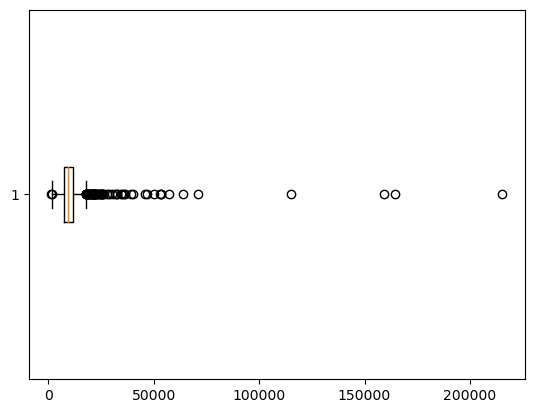

In [32]:
plt.boxplot(df['LotArea'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf3e6e210>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf3e6fc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf3e6d750>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf3e70190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf3e71150>],
 'means': []}

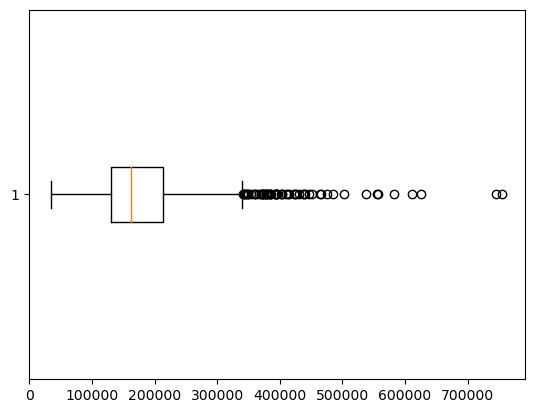

In [34]:
plt.boxplot(df['SalePrice'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf3efb210>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf3f04550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf3efab50>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf3f056d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf3f05e50>],
 'means': []}

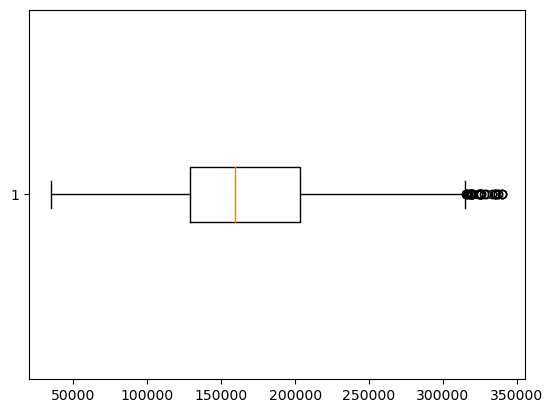

In [35]:
plt.boxplot(new_df['SalePrice'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf3f4a8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf3f4bbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf3f4a050>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf3f58d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf3f59590>],
 'means': []}

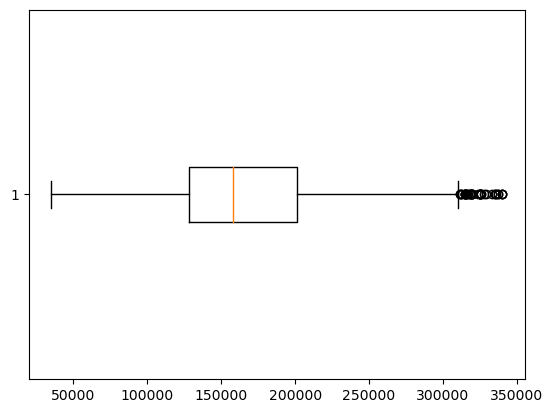

In [36]:
plt.boxplot(new_df_2['SalePrice'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf3fbc450>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf3fbd7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf3fb3cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf3fbe910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf18b30d0>],
 'means': []}

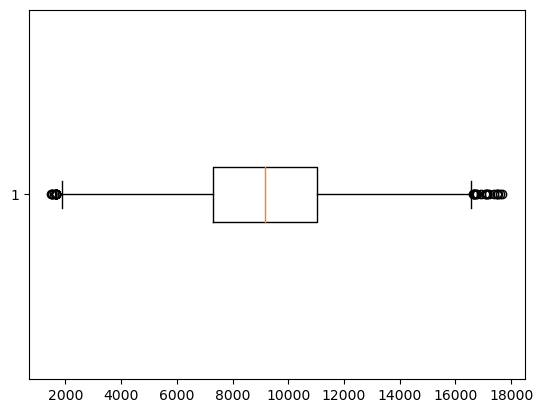

In [37]:
plt.boxplot(new_df_2['LotArea'], vert = False)

<Axes: >

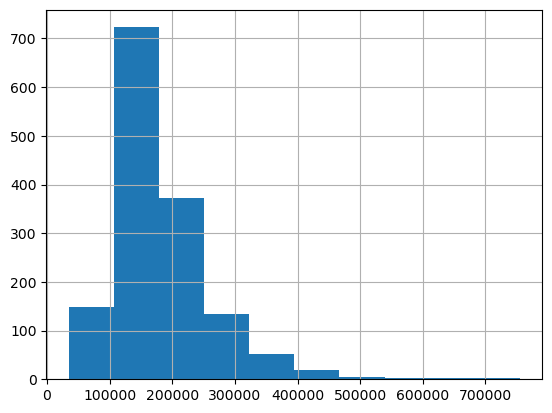

In [39]:
df['SalePrice'].hist()

<Axes: >

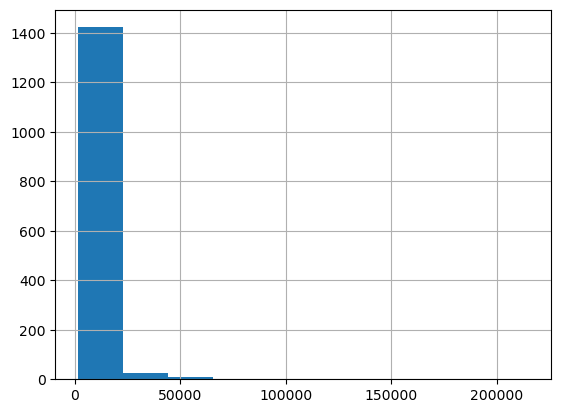

In [40]:
df['LotArea'].hist()

Text(0, 0.5, 'Sales price')

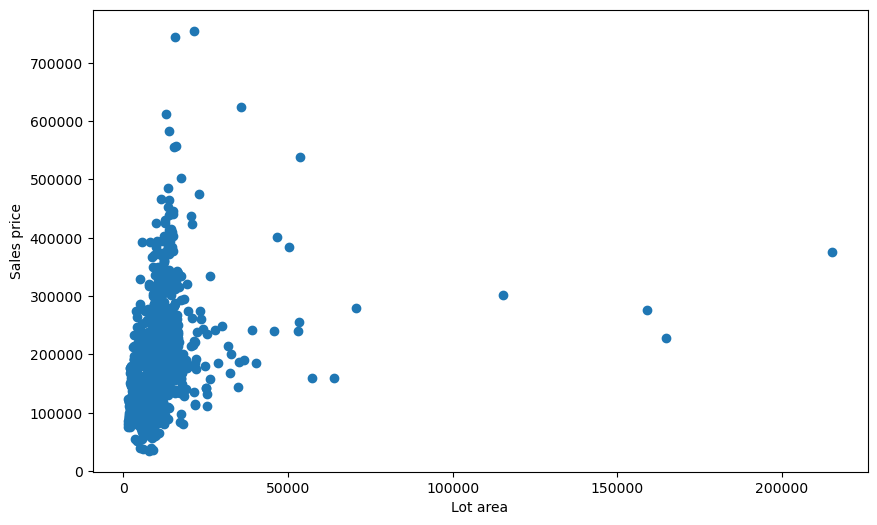

In [41]:
fig ,ax = plt.subplots(figsize = (10, 6))
ax.scatter(df['LotArea'], df['SalePrice'])
ax.set_xlabel('Lot area')
ax.set_ylabel('Sales price')

# Quantile based capping and flooring

In [42]:
floor = df['SalePrice'].quantile(0.01)
cap = df['SalePrice'].quantile(0.99)
print('Floor : ', floor)
print('Floor : ', cap)

Floor :  61815.97
Floor :  442567.01000000053


In [43]:
import numpy as np

In [44]:
df1 = df.copy()
df1['SalePrice'] = np.where(df1['SalePrice']<floor, floor, df1['SalePrice'])
df1['SalePrice'] = np.where(df1['SalePrice']>cap, cap, df1['SalePrice'])

In [45]:
df1.shape

(1460, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf3fcb750>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf42302d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf41c96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf4231350>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf4231ad0>],
 'means': []}

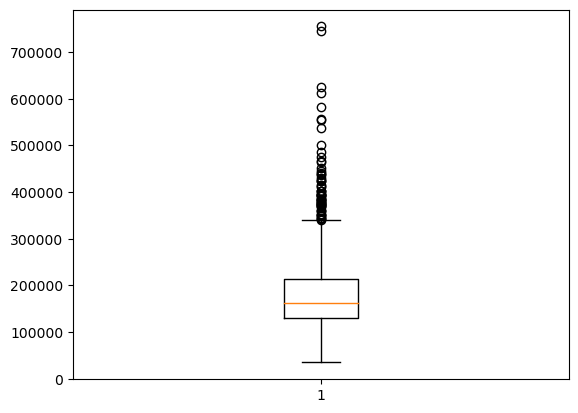

In [46]:
plt.boxplot(df['SalePrice'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbefdc2d10>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbefdc0450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbefdc37d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbefdb8310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbefdbbd50>],
 'means': []}

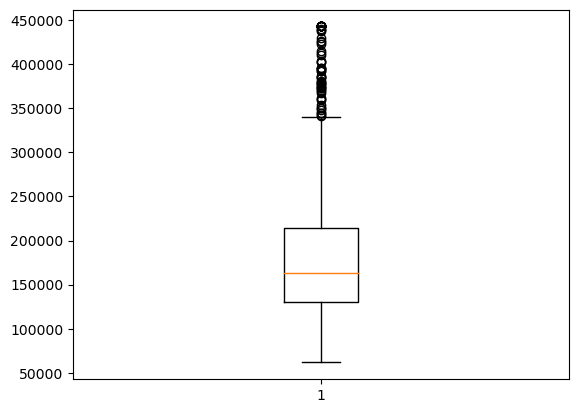

In [47]:
plt.boxplot(df1['SalePrice'])

In [48]:
floor = df['SalePrice'].quantile(0.10)
cap = df['SalePrice'].quantile(0.90)
print('Floor : ', floor)
print('Floor : ', cap)

df2 = df.copy()
df2['SalePrice'] = np.where(df2['SalePrice']<floor, floor, df2['SalePrice'])
df2['SalePrice'] = np.where(df2['SalePrice']>cap, cap, df2['SalePrice'])

Floor :  106475.0
Floor :  278000.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1fbf440f050>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbf4418910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbf43fa050>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbf4419ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbf441a9d0>],
 'means': []}

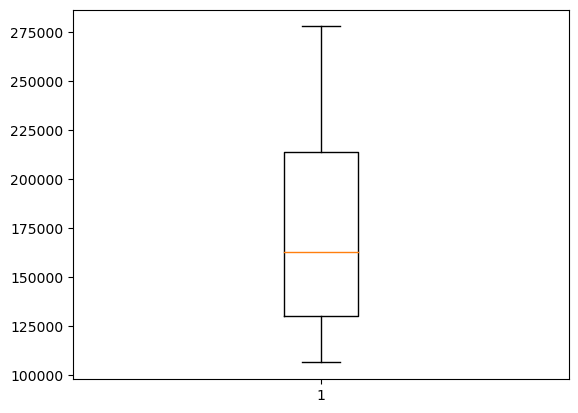

In [49]:
plt.boxplot(df2['SalePrice'])

In [62]:
df_fresh = df.copy()

In [67]:
index = df_fresh[(df_fresh['SalePrice'] < lower_whisker[1]) | (df_fresh['SalePrice'] > upper_whisker[1])].index

In [68]:
index.shape

(61,)

In [69]:
df_fresh.drop(index, inplace = True)
df_fresh.shape

(1399, 2)

# Skewness and Log Transformation

In [70]:
print(df['SalePrice'].skew().round(2))

1.88


In [72]:
# .map can be replaced by .apply
df['log_scale'] = df['SalePrice'].map(lambda i: np.log(i) if i>0 else 0)
print(df['log_scale'].skew().round(2))

0.12


<Axes: >

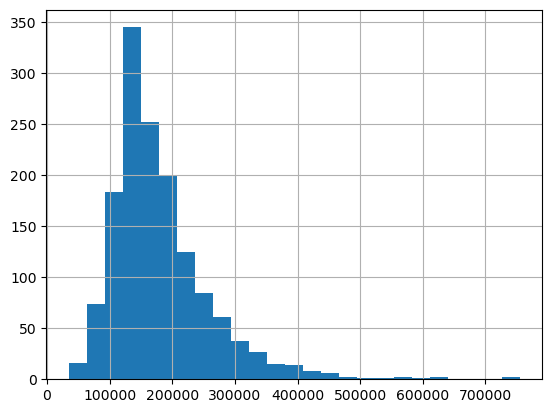

In [76]:
df['SalePrice'].hist(bins = 25)

<Axes: >

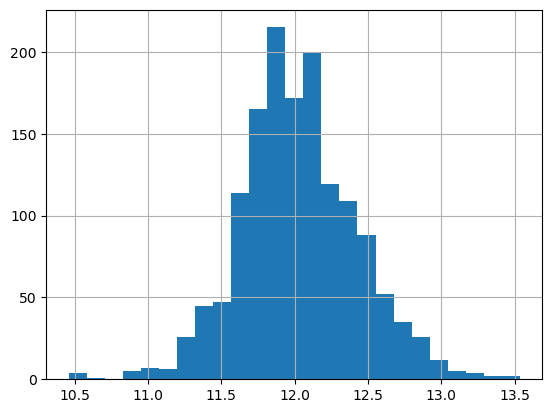

In [77]:
df['log_scale'].hist(bins = 25)